In [2]:
!pip install rasterio
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 44.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 9.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


In [6]:
import numpy as np
import rasterio as rio
import earthpy.plot as ep
import earthpy.spatial as es
import matplotlib.pyplot as plt
from matplotlib import colors

In [7]:
#Read and covert the .tiff geo-tagged image into array
band_4 = rio.open('/content/LC08_L2SP_122044_20221224_20230103_02_T1_SR_B4.TIF')
band_4 = band_4.read(1)
band_4 = np.array(band_4).astype('float')

band_5 = rio.open('/content/LC08_L2SP_122044_20221224_20230103_02_T1_SR_B5.TIF')
band_5 = band_5.read(1)
band_5 = np.array(band_5).astype('float')

band_6 = rio.open('/content/LC08_L2SP_122044_20221224_20230103_02_T1_SR_B6.TIF')
band_6 = band_6.read(1)
band_6 = np.array(band_6).astype('float')

band_10 = rio.open('/content/LC08_L2SP_122044_20221224_20230103_02_T1_ST_B10.TIF')
band_10 = band_10.read(1)
band_10 = np.array(band_10).astype('float')

In [8]:
#Normalized Difference Vegetation Index
ndvi = es.normalized_diff(b1=band_5, b2=band_4)

#Normalized Difference Moisture Index
ndmi = es.normalized_diff(b1=band_5, b2=band_6)

#Compute the proportion of vegetation
Py = ((ndvi-0.2)/(1-0.2))**2

#Compute the emissivity from proportion of vegetation and NVDI
e = 0.004*Py+0.986

#Compute the TOL (top of atmosphere spectral radiance)
TOL = 0.0003342* band_10 + 0.1

#Convert TOA (top of atmosphere spectral radiance) to Brightness temperature
BT = ((1321.0789/ np.log (774.8853/ TOL )+1)) -273.15

#Compute the land surface temperature
LST = (BT / (1 + (0.00115* BT / 1.4388) * 1) )

#To convert Fahrenheit (F) to Celsius (C) Formula
LSTC =  ((LST-32)*5)/9

/usr/local/lib/python3.8/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


In [9]:
# Create the color mapping for NVDI
color_c_ndvi = ['#16489e', '#878b94', '#fff39c', '#8ce854', '#17d123', '#2d7a11']
# Create a color bar
c_ndvi = colors.ListedColormap(color_c_ndvi)
bounds = [-0.28,0.015,0.14,0.18,0.27,0.36]
n_nvdi = colors.BoundaryNorm(bounds, c_ndvi.N)

# Create the color mapping for Emissivity
color_c_e = ['#2d7a11','#17d123','#878b94','#fff39c','#16489e']
# Create a color bar
c_e = colors.ListedColormap(color_c_e)
bounds_2 = [0.980,0.986,0.9861,0.9862,0.9866]
n_e = colors.BoundaryNorm(bounds_2, c_e.N)

color_c_t = ['#eeeee4','#abdbe3','#6dcde2','#64bfd5','#1f8ab4','#1e81b0','#0c659f','#063970']
# Create a color bar
c_t = colors.ListedColormap(color_c_t)
bounds_3 = [9,10,11,12,13,14,15,16]
n_t = colors.BoundaryNorm(bounds_3,c_t.N)

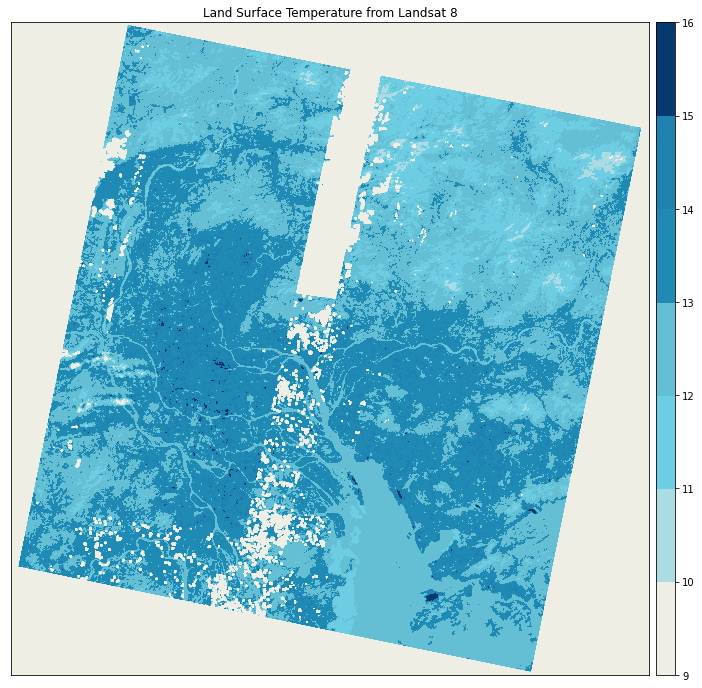

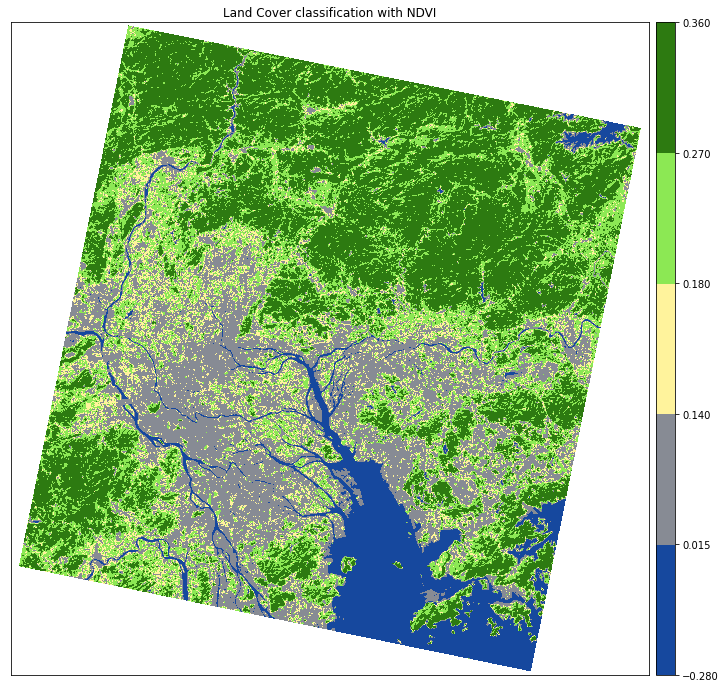

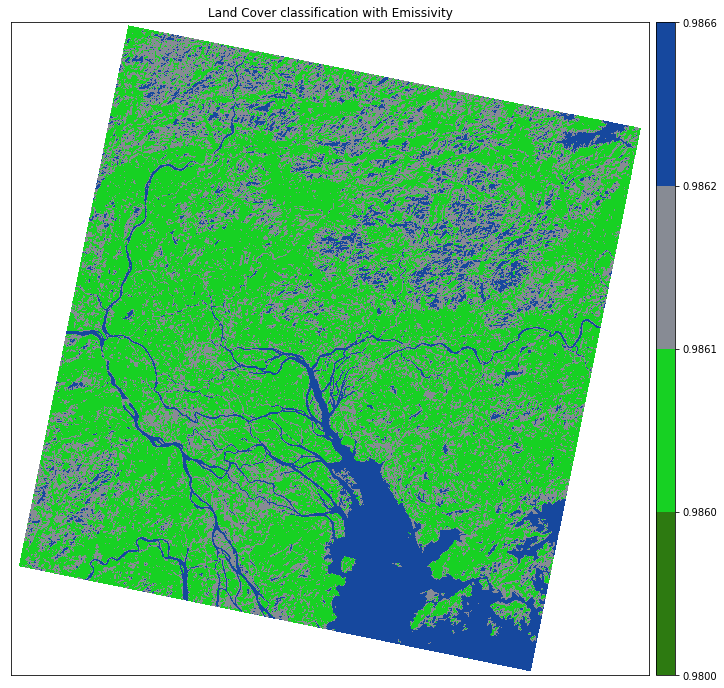

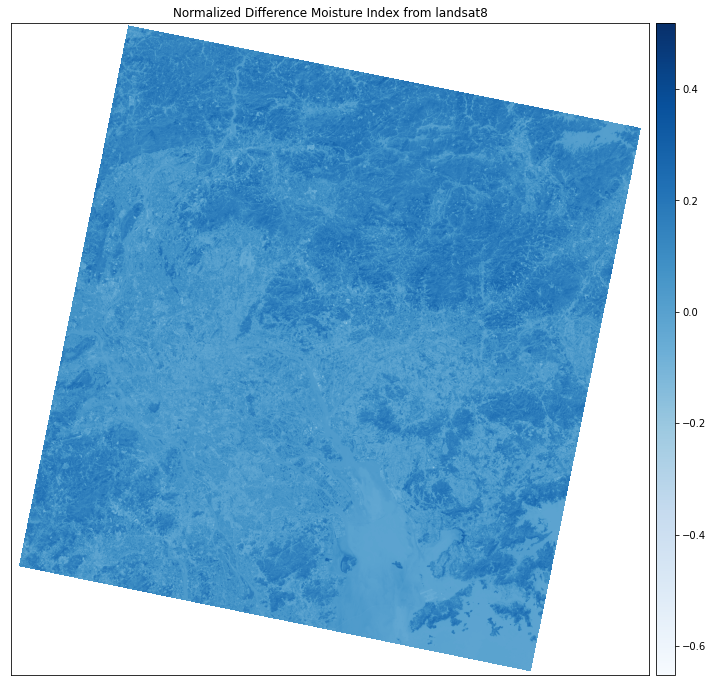

In [10]:
# Plot the color bar
ep.plot_bands(LSTC,cmap=c_t,title="Land Surface Temperature from Landsat 8",norm=n_t)
ep.plot_bands(ndvi,cmap=c_ndvi,title="Land Cover classification with NDVI", norm=n_nvdi)
ep.plot_bands(e,cmap=c_e,title="Land Cover classification with Emissivity",norm=n_e)
ep.plot_bands(ndmi,cmap='Blues',title="Normalized Difference Moisture Index from landsat8")

# Show the figure
plt.show()